In [5]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from minima_volume.analysis_funcs import (  grab_folder_names,
                                            load_base_train_size,
                                            list_additional_data,
                                            load_param_num,
                                            multiple_minima_fixed_landscape,
                                            fixed_landscape_minima_labels,
                                            plot_fixed_landscape_minima_pair,
                                            model_volume_across_targets,
                                            append_cutoff_points,
                                            varying_landscape_minima_labels,
                                            plot_minima_volume_vs_data_level,                    
)

problem_name = ""

loss_value = 5  # Loss value to analyze
data_level_log = False #Is the data log distributed?
base_output_dir = "analysis"  # Root folder to save all plots
os.makedirs(base_output_dir, exist_ok=True)

# Data for the loss landscape levels
experiment_folders, data_modifications = grab_folder_names()

base_train_size = load_base_train_size(experiment_folders[0])
model_data_sizes = list_additional_data(experiment_folders[0])
num_params = load_param_num(experiment_folders[0], data_modifications[0], loss_value = loss_value)

base_shift = 0
if data_modifications[0].startswith("data_"):
    base_shift = base_train_size  # Shift to reflect true dataset size

print("Experiment folders: ", experiment_folders)
print("Different data levels where loss landscapes were computed:", data_modifications)
print("The base train size is: ", base_train_size)
print("Data levels where models were trained: ", model_data_sizes)
print("The number of model parameters is ", num_params)

First entry: Model_0, base_train_size = 50
Experiment folders:  ['model_40_data_10', 'model_0_data_10', 'model_22_data_10', 'model_32_data_10', 'model_14_data_10', 'model_49_data_10', 'model_9_data_10', 'model_15_data_10', 'model_8_data_10', 'model_48_data_10', 'model_1_data_10', 'model_41_data_10', 'model_33_data_10', 'model_23_data_10', 'model_17_data_10', 'model_38_data_10', 'model_28_data_10', 'model_21_data_10', 'model_31_data_10', 'model_3_data_10', 'model_43_data_10', 'model_30_data_10', 'model_20_data_10', 'model_42_data_10', 'model_2_data_10', 'model_16_data_10', 'model_29_data_10', 'model_39_data_10', 'model_13_data_10', 'model_25_data_10', 'model_35_data_10', 'model_47_data_10', 'model_7_data_10', 'model_34_data_10', 'model_24_data_10', 'model_6_data_10', 'model_46_data_10', 'model_12_data_10', 'model_4_data_10', 'model_44_data_10', 'model_26_data_10', 'model_36_data_10', 'model_19_data_10', 'model_10_data_10', 'model_11_data_10', 'model_45_data_10', 'model_5_data_10', 'mode

In [6]:
# Preparation for the specific plots
import matplotlib as mpl

#cmap = mpl.colormaps.get_cmap("winter")  # blue → green
#background_colors = [cmap(i) for i in np.linspace(0, 1, 10)]

#natural_label = "Minima (On Base Dataset)"
other_label = "Minima (Larger Datasets)"

In [7]:
for data_modification in data_modifications:
    print(f"\nProcessing data modification folder: {data_modification}")

    # Create output folder for this data_modification
    save_dir = os.path.join(base_output_dir, data_modification)
    os.makedirs(save_dir, exist_ok=True)

    # Get axis labels and titles
    labels = fixed_landscape_minima_labels(data_modification, base_train_size)

    # Extract minima landscapes
    all_mdl, all_log_rn, all_test_loss, all_test_acc = multiple_minima_fixed_landscape(
        experiment_folders, data_modification, loss_value #mdl is modification data level
    )
    # print(all_log_rn)
    # print(all_test_acc)

    all_log_rn_list = [val for sublist in all_log_rn for val in sublist]
    all_test_acc_list = [val for sublist in all_test_acc for val in sublist]
    all_test_loss_list = [val for sublist in all_test_loss for val in sublist]

    print(all_log_rn_list)
    print(all_test_acc_list)
    print(all_test_loss_list)


Processing data modification folder: data_2000
[12700.732061802995, 12658.88113618026, 13152.858084422414, -inf, 12472.44820698705, 11925.127880846589, 11847.893652858093, 9556.177279122243, 12470.807776444148, 12098.70031050713, 11684.219150921079, -inf, 13733.174926354905, 13043.694698138177, 11237.155898077366, 12036.49409669917, 12748.241123258536, 10477.655321974775, 12132.864414192056, 11382.73542725605, -inf, 11462.168214759893, 13256.037062077803, 9754.786038809723, 11564.276172161382, -inf, 10819.034942710021, -inf, 10951.628255011196, 8653.122122240437, 14185.42761668545, 12957.634212246627, 12552.087655798918, 10430.074471361022, 12432.249731437218, 13774.622676964955, 10421.525624833326, 11775.382287566359, 9982.44012310508, 8153.6414331863325, 12053.671686673244, 14089.995644192006, 11877.541714020363, 13767.212413901452, -inf, 14299.355415158745, -inf, 13515.704694128748, 12964.041809484039, 12772.899604016437]
[0.72525, 0.79025, 0.74125, 0.72525, 0.7555, 0.81875, 0.7892

Collected results for 50 experiments
⚠️ Skipped model_40_data_10 (target=0): Model_0: loss curve never exceeds threshold=5
⚠️ Skipped model_0_data_10 (target=0): Model_0: loss curve never exceeds threshold=5
Model_0: first exceedance at index 927 (value=5.005314826965332, threshold=5)
Appended cutoff for model_22_data_10 | target=0, cutoff_idx=927
Model_0: first exceedance at index 480 (value=5.011778831481934, threshold=5)
Appended cutoff for model_32_data_10 | target=0, cutoff_idx=480
⚠️ Skipped model_14_data_10 (target=0): Model_0: loss curve never exceeds threshold=5
⚠️ Skipped model_49_data_10 (target=0): Model_0: loss curve never exceeds threshold=5
⚠️ Skipped model_9_data_10 (target=0): Model_0: loss curve never exceeds threshold=5
Model_0: first exceedance at index 847 (value=5.013333797454834, threshold=5)
Appended cutoff for model_15_data_10 | target=0, cutoff_idx=847
Model_0: first exceedance at index 920 (value=5.012800693511963, threshold=5)
Appended cutoff for model_8_dat

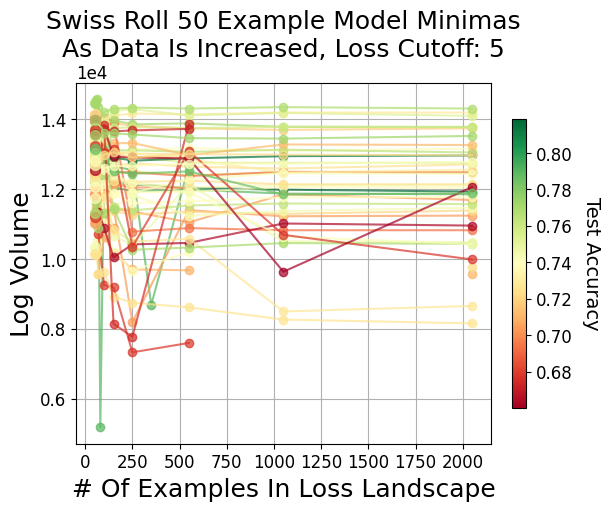

In [8]:
# For the poisoning experiments, this plot has no meaning

labels = varying_landscape_minima_labels(
    data_modification_folder=data_modifications[0], # Random choice to grab datatype from
    base_train_size=base_train_size,
)

results_dict = model_volume_across_targets(
    target_model_data_levels=model_data_sizes,
    loss_value=loss_value,
    experiment_folders=experiment_folders
)
results_with_cutoff = append_cutoff_points(results_dict, threshold=loss_value, base_dir=".")

found_minima_vol, found_minima_dataset = plot_minima_volume_vs_data_level(
    results_dict = results_with_cutoff,
    data_type=labels["data_type"],        
    base_train_size=base_train_size, 
    xlabel=labels["xlabel"],
    ylabel="Log Volume",
    suptitle=f"{problem_name}",
    title=f"Swiss Roll 50 Example Model Minimas\nAs Data Is Increased, Loss Cutoff: {loss_value}",
    log_scale = data_level_log,
    alpha=0.7,
    plot_average=False,
    output_dir=base_output_dir, filename="log_volumes_vs_data_levels",
    xlabel_size=18, ylabel_size=18, title_size=18, suptitle_size=18, legend_size=14, legend_title_fontsize=14,
    plot_accuracy_colors=True,
)